# Signal Detection Theory (SDT): Tutorial

__Zhuanghua Shi__ (shi@lmu.de)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/lecture_2021/signal_detection_theory_practice.ipynb)

## 1. Psychometric function (PF) and Signal Detection Theory (SDT)

A psychometric function (PF) indicates human performance of a psychophysical task (e.g., classification) at a given intensity of a physical stimulus (e.g., velocity, duration, brightness, etc.). Recall a typical response is binary categorical response, and the sensory input is continuous from undetectable (or chance level) to surely detectable range, the probability of response shows a sigmoid curve. A general psychometric function includes the chance level and attentional lapses:

$$\Psi(x,\alpha, \beta, \gamma, \lambda) = \gamma + (1-\gamma -\lambda) F(x, \alpha, \beta)$$
where $\alpha$ is the threshold, $\beta$ the sensitivity, $\gamma$ the chance level, and $\lambda$ the lapse rate. $F(.)$ is a sigmoid function, such as logistic function:

$$F(x,\alpha, \beta) = \frac{1}{1 + e^{-\beta(x-\alpha)}}$$ 

## High-threshold theory

Let's imagine a simple two-interval force-choice (2IFC) task in which observers had to identify which interval contains a target. This kind of 2IFC task can be treated as a signal detection paradigm. Let's denote the interval containing the stimulus as $S$ (signal), and the blank interval as $N$ (noise). The below figure (Kingdom & Prins, 2016) illustrates a probability distribution of two signals. 

![High Threshold](https://github.com/strongway/tutorial_data_science/raw/master/figures/high_threshold.png)
_Figure from Kingdom and Prins (2016), Figure 4.6_

Whether or not the sensory process will detect the sitmulus on any trial is determined by the amount of sensory evidence accumulated by the sensory system. Let's assume that the mean amount of accumulated evidence is a linear function of stimulus intensity $x$:

$$\mu(x)=\pi + \rho x$$

According to high-threshold theory, the sensory mechanism will detect the stimulus when the amount of sensory evidence exceeds a fixed internal criterion or threshold. As its name implied, high-threshold theory assumes that the internal threshold is high. More specifically, the threshold is assumed to be high enough such that the probability that the threshold is exceedd when $x=0$ (i.e., noise) is effective zero. The decision is based on binary information only: either the sensory evidence was in excess of the threshold, or the sensory evidence was not in excess of the threshold. Given the assumptions we have made, function $F(x)$, which describes the probability that the threshold will be exceeded by a stimulus of intensity $x$, will be the cumulative normal distribution (see the inset in the above Figure). 

By contrast, there is no such thing as a fixed internal threshold according to SDT. Instead, SDT makes the assumption that sensory mechanism generate a graded signal, corresponding to the degree of sensory evidence accumulated. The decision process has access  to the degree of sensory evidence accumulated on both Signal and Noise. We may think of any stimulus as a sample from the probability density function associated with the stimulus. Even in the absence of a stimulus, differing degrees of sensory evidence results, and we may think of the presentation of the noise interval as a sample from the probability density function associated with the noise stimulus. Thus, the decision is based on the relative amplitude of two samples: Signal $N(\pi + \rho x), \sigma^2$, and Noise $N(\pi, \sigma^2)$. 

For unbiased 2AFC, one simple decision rule is that if the sample taken during the sitmulus interval has a value greater than the sample taken during the noise interval. That is, if the difference between the sample value derived from the signal interval and the sample value derived from the noise interval exceed zero, the response will be correct. The difference in sensory evidence will be distributed as $N(\rho x, 2 \sigma^2)$. 

Reference:

Kingdom, F. A. A., & Prins, N. (2016). Psychophysics: A Practical Introduction. Academic Press. 

## 2. Calculation of d' and bias C for M-AFC

### 2.1 Yes/No 1AFC

Yes/No paradigm, known as 1AFC, is particularly prone to bias. Suppose two observers have the same internal sensitivity, but use different response criteria. Observed psychometric functions would differ a lot between two observers. The SDT can distinguish the response bias from the sensitivity with the following estimates:

$$d' = z(Hit) - z(FA)$$

$$c =-[z(Hit)+z(FA)]/2$$


### 2.2 Unbiased 2IFC

With the standard 2IFC procedure, the N and S+N stimuli are presented together in a trial as two alternatives. Remember that the decision rule is to choose the alternative in which the internal signal is biggest. If the observer adopts this rule, trials in which the _difference_ between the S+N and N samples are positive will result in a correct decision. The variance of the _difference_ is the summation of the variances of the S+N and N. The proportion correct for 2AFC is thus given by the grey area in the lower panel to the right of zero. This is:

$$ P_c = \Phi(d'/\sqrt{2})$$

and 

$$ d' = z(P_c) \sqrt2$$

![2AFC](https://github.com/strongway/tutorial_data_science/raw/master/figures/2afc.jpg)
_Graphical illustration of how d' is calculated from an unbiased 2AFC task. Figure from Kingdom and Prins (2016)_


For the __biased 2IFC__, the calculation is the same as shown in 1AFC. 


## 3. Confusion Matrix and ROC curve

1AFC or 2AFC are essential binary classification. The probabilities of outcomes from S and N define the confusion matrix. 

Response | Signal  |  Noise
-------- | -------  | -------
Yes      | Hit      | FA
No       | Miss     | CR

ROC curve plots with the horizontal axis (FA) and the vertical axis (Hit). On the same ROC curve, Hit/FA with liberal criteria locate at the right-up corner, whereas Hit/FA with conservative criteria locate at the lower-left corner. A ROC curve with high d' relative to low d' has __a larger area under the curve__. Sometimes we also use the Area under the curve (AUC) to measure the sensitity. 

Assuming Gaussian distribution, we have the folling relation between d' and AUX ($A_z$):

$$A_z = \Phi(\frac{d'}{\sqrt 2})$$

Note, sometimes we also use ROC curves and AUCs to select the best logistic regression models. 

## 4. Example: Neural decoding (Britten et al. 1992)

[Britten and collegues (1992)](https://doi.org/10.1523/JNEUROSCI.12-12-04745.1992) compared the ability of psychophysical observers and single cortical neurons to discriminate weak motion signals in a stochastic visual display. 

![RDM](https://github.com/strongway/tutorial_data_science/raw/master/figures/random_dot_motion.jpg)

They recorded money's behavioral responses as well as responses from MT neurons. The following Figure shows frequency histogram of reponses obtained from a single MT neuron at five different correlation levels. The black bars illustrate reponses for null direction motion, while the white bars represent responses for motion in the neuron's preferred direction. We can see clearly the distance between the _signal_ and the _noise_ depends on the motion coherence.  

![MT Neurons responses](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_frequencies.jpg)

Given that one sees a firing rate from that neuron in one trial, how should one decode whether the RDM was moving upward or downward? It depends on the decision criterion! The unbias decision should set the criterion in the middle. 

The below figure plots the ROC curves for the five pairs. Each ROC was generated by increasing the criterion level from 0 to 120 spikes in one-spike increments. Recall the area under the ROC is an alternative measure of the sensitivity, which is shown on the right side of the curve. 

![ROC](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_rocs.jpg)


And you can see from Figure below, the neuron's senstivity curve is very close to the behavioral responses. 

![comparison](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_comparisons.jpg)



## 5. Practice

The practice data come from the following study:

Shi, Z., Allenmark, F., Zhu, X., Elliott, M. A., & Müller, H. J. (2019). To quit or not to quit in dynamic search. Attention, Perception & Psychophysics. https://doi.org/10.3758/s13414-019-01857-7

In this study, we examined the search performance between the static and dynamic displays. One striking finding from dynamic search (Horowitz & Wolfe, 1998) is that the search slope, measured by search time per item, is similar to static search. In this study, we examined how decision crtieria that related to the quiting process influence the search performance. 

In the following practice, we estimate the target detection sensitivity and decision criteria for both the static and dynamic search displays. 

The data are availabe in the following github repository:

https://github.com/msenselab/dynamic_search


### Step 1. Load data

Let us first load the first experimental data: 

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

#load data
dat = pd.read_csv('https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv', sep = ',')
dat = dat.assign(resp = dat.resp -1) # change to 0 to 1 for two categories
print(dat.head())

    target  setsize     dyn  resp        rt  sub  exp  correct
0   Absent       12  Static     1  2.583007    1    1        1
1   Absent        8  Static     1  0.935967    1    1        1
2  Present       16  Static     0  0.794771    1    1        1
3  Present        8  Static     0  1.241838    1    1        1
4   Absent       12  Static     1  1.759485    1    1        1


In [7]:
# let's quickly obtain the confusion matrix
macc = dat.groupby(['sub', 'dyn','target','setsize']).agg({'correct':['mean','count']})
macc.columns = macc.columns.map('_'.join) # combine multi-level columns
macc = macc.reset_index()
macc.head()



,sub,dyn,target,setsize,correct_mean,correct_count
0,1,Dynamic,Absent,8,1.000000,35
1,1,Dynamic,Absent,12,0.971429,35
2,1,Dynamic,Absent,16,0.914286,35
3,1,Dynamic,Present,8,0.971429,35
4,1,Dynamic,Present,12,1.000000,35


### Step 2. Data transformation

We quickly realized that in some conditions, the search is relative easy and participants can performance the task without any error. This pose a potential problem when we want to calculate the z-score. For such extreme values, usually we need to make some adjustments. A common method for  adjustments is to apply a small correction ([Macmillan & Kaplan, 1985](https://www.ncbi.nlm.nih.gov/pubmed/4034817); Stanislaw & Todorov, 1999): rates of 0 were replaced by 0.5/n, and rates of 1 by 1–0.5/n, where n is the number of trials, respectively.


In [8]:
print([macc.correct_mean.min(),macc.correct_mean.max()])

[0.42857142857142855, 1.0]


In [9]:
# percentage of correct after adjustment
macc['pc_a'] = np.where(macc.correct_mean == 1, 1 - 0.5/macc.correct_count, macc.correct_mean)
macc.head()

,sub,dyn,target,setsize,correct_mean,correct_count,pc_a
0,1,Dynamic,Absent,8,1.000000,35,0.985714
1,1,Dynamic,Absent,12,0.971429,35,0.971429
2,1,Dynamic,Absent,16,0.914286,35,0.914286
3,1,Dynamic,Present,8,0.971429,35,0.971429
4,1,Dynamic,Present,12,1.000000,35,0.985714


After adjust the data, we need to transform the 'long' format table to 'wide' format table as confusion matrix. 
Note, in this example, the signal is 'Target present', and the noise is 'Target Absent'. So we need the column 'target' for transformation. Transformation can be done by pandas `pivot()` function. 

In [10]:
acc_wide = macc.pivot(index=['sub','dyn','setsize'], columns = 'target', values = 'pc_a').reset_index()
acc_wide.head()

target,sub,dyn,setsize,Absent,Present
0,1,Dynamic,8,0.985714,0.971429
1,1,Dynamic,12,0.971429,0.985714
2,1,Dynamic,16,0.914286,0.914286
3,1,Static,8,0.985714,0.985714
4,1,Static,12,0.985714,0.971429


### Step 3. Calculation of d' and C

$$d' = z(Hit) - z(FA)$$
$$C = - (z(Hit)+ z(FA))/2$$

Recall that for the Two-alternative discrimination task, the above equations are equal to 

$$d' = z(Present) + z(Absent) $$

$$C = -[z(Present) - z(Absent)]/2$$

We use scipy function`scipy.stats.norm.ppf()` to calculate the z-score. 

Note: `scipy.stats.zscore()` is used for the zscore within the numpy array after normalization, which is different from what we want. 

In [11]:
# now we calculate d' and C
acc_wide['d'] =stats.norm.ppf(acc_wide.Present) + stats.norm.ppf(acc_wide.Absent)
acc_wide['c'] = -(stats.norm.ppf(acc_wide.Present) - stats.norm.ppf(acc_wide.Absent))/2
acc_wide.head()

target,sub,dyn,setsize,Absent,Present,d,c
0,1,Dynamic,8,0.985714,0.971429,4.091566,0.143567
1,1,Dynamic,12,0.971429,0.985714,4.091566,-0.143567
2,1,Dynamic,16,0.914286,0.914286,2.735256,-0.000000
3,1,Static,8,0.985714,0.985714,4.378700,-0.000000
4,1,Static,12,0.985714,0.971429,4.091566,0.143567


### Step 4. Visualization

Let's first check the sensitivity. As you can see from the figure below, the dynamic display had much worse detection sensitivity as compared to the static display. The reduction of the sensitivity as a function of the display set size, however, remained the same for two display types. 




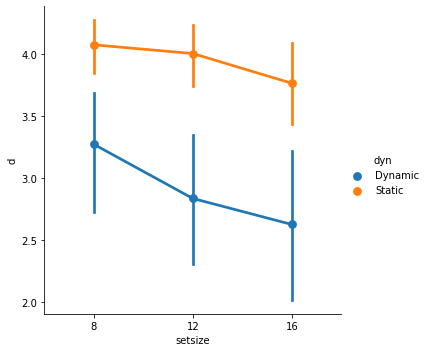

In [16]:
sns.catplot(x = 'setsize', y = 'd',  hue = 'dyn', kind = 'point', data = acc_wide)

Now let's check the decision criteria C. 

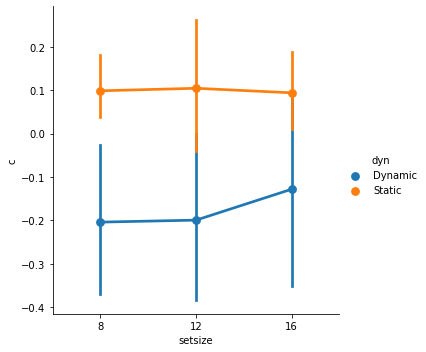

In [18]:
sns.catplot(x = 'setsize', y = 'c',  hue = 'dyn', kind = 'point', data = acc_wide)

As you can see from the above figure, participants tended to make more liberal responses in  dynamic search relative to static search. That is, they were more likely make 'target present' responses than 'target absent' responses. 

However, this was changed when we applied reward manipulation in Exp. 2. 

### Your practical task

Your practical task is to do similar analysis for Experiment 2. 
To facilitate your analysis, the data have been loaded using the following code: 

In [20]:
#load data
exp2 = pd.read_csv('https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp2.csv', sep = ',')
exp2 = exp2.assign(resp = exp2.resp -1) # change to 0 to 1 for two categories
exp2.head()

,target,setsize,dyn,resp,rt,sub,reward,correct
0,Absent,12,Static,1,2.058311,1,Absent,1
1,Present,8,Static,0,0.649519,1,Absent,1
2,Present,16,Static,0,0.599557,1,Absent,1
3,Present,12,Static,0,0.489666,1,Absent,1
4,Absent,12,Static,1,1.898485,1,Absent,1
